In [1]:
require(ggplot2)
source("00_functions.R")

library(repr)
options(repr.plot.width=8, repr.plot.height=5)
set.seed(111)

Loading required package: ggplot2



 loading required packages



Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2
Loading required package: hypervolume
Loading required package: Rcpp
Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Loading required package: plyr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### read in data

In [2]:
#trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
trees_df   = read.csv("../Results/trees_genus_matrix.csv", row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)

trees_cen = read.csv("../Results/trees_census_dates.csv")
btles_cen = read.csv("../Results/btles_census_dates.csv")
mamls_cen = read.csv("../Results/mamls_years_dates.csv")

### pca on all subplot_census by species matrix

In [3]:
pca.rslt_trees = do_pca(trees_df, scale = F, plot = F)
pca.rslt_mamls = do_pca(mamls_df, scale = F, plot = F)
pca.rslt_btles = do_pca(btles_df, scale = F, plot = F)

cat("Explained Varience Trees:")
pca.rslt_trees@exp.var[0:3]
cat("Explained Varience Mammals:")
pca.rslt_mamls@exp.var[0:3]
cat("Explained Varience Beetles:")
pca.rslt_btles@exp.var[0:3]

Explained Varience Trees:

PC1       PC2       PC3 
0.3214554 0.1322802 0.0774065

Explained Varience Mammals:

PC1       PC2       PC3 
0.2644064 0.2403138 0.1133896

Explained Varience Beetles:

PC1        PC2        PC3 
0.87505335 0.08444175 0.01805700

### construct hyervolumes

In [4]:
hvs_rslts_trees = hvs_rslts(pca.rslt_trees@axis, axis = c("PC1", "PC2", "PC3"), "seq", trees_cen)
hvs_rslts_mamls = hvs_rslts(pca.rslt_mamls@axis, axis = c("PC1", "PC2", "PC3"), "seq", mamls_cen)
hvs_rslts_btles = hvs_rslts(pca.rslt_btles@axis, axis = c("PC1", "PC2", "PC3"), "seq", btles_cen)

# cat("\n\n")
# cat("Trees: ",   sum(is.na(hvs.rslts_trees@rslts$centroid_PC1))/nrow(hvs.rslts_trees@rslts), "\n")
# cat("Mammals: ", sum(is.na(hvs.rslts_mammals@rslts$centroid_PC1))/nrow(hvs.rslts_mammals@rslts), "\n")
# cat("Beetles: ", sum(is.na(hvs.rslts_beetles@rslts$centroid_PC1))/nrow(hvs.rslts_beetles@rslts))


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  28  of  28 :  O_2013
Comparing Hypervolume 24  of  24 :  O_2016-2017

Building Hypervolume  60  of  60 :  VJR_P3
Comparing Hypervolume 40  of  40 :  VJR_P2-P3


### plot hypervolumes

,plot,census_step,centroid_change,overlap,unique_1,unique_2,abs_vol_change,per_vol_change
D_2011-2012,D,2011-2012,1.08036672,0.13842357,0.1614238,0.85778699,1.113969e+02,4.89662067
D_2012-2013,D,2012-2013,NA,NA,NA,NA,NA,NA
D_2013-2014,D,2013-2014,NA,NA,NA,NA,NA,NA
D_2014-2015,D,2014-2015,2.12024042,0.04951035,0.1380753,0.95009383,1.455921e+02,16.27090329
D_2015-2016,D,2015-2016,1.74425305,0.02529966,0.9746717,0.04281346,-1.504508e+02,-0.97353878
D_2016-2017,D,2016-2017,0.64655068,0.18519081,0.7622419,0.54418680,-1.956277e+00,-0.47838690
E_2011-2012,E,2011-2012,0.97655669,0.41869252,0.5280455,0.21231255,-1.997688e+01,-0.40083536
E_2012-2013,E,2012-2013,NA,NA,NA,NA,NA,NA
E_2013-2014,E,2013-2014,NA,NA,NA,NA,NA,NA
E_2014-2015,E,2014-2015,0.47790811,0.39824236,0.1005542,0.58320099,1.126452e+01,1.15798440


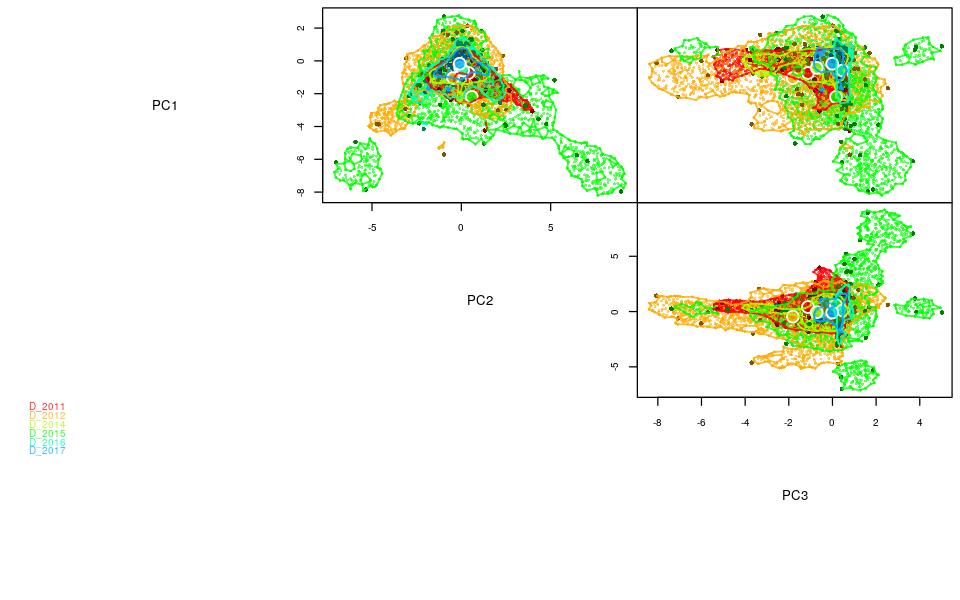

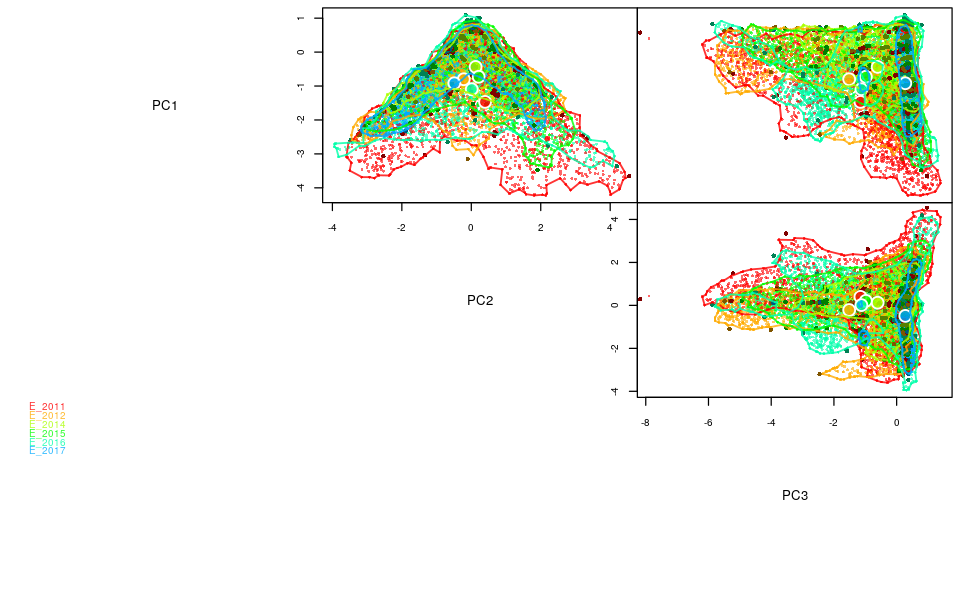

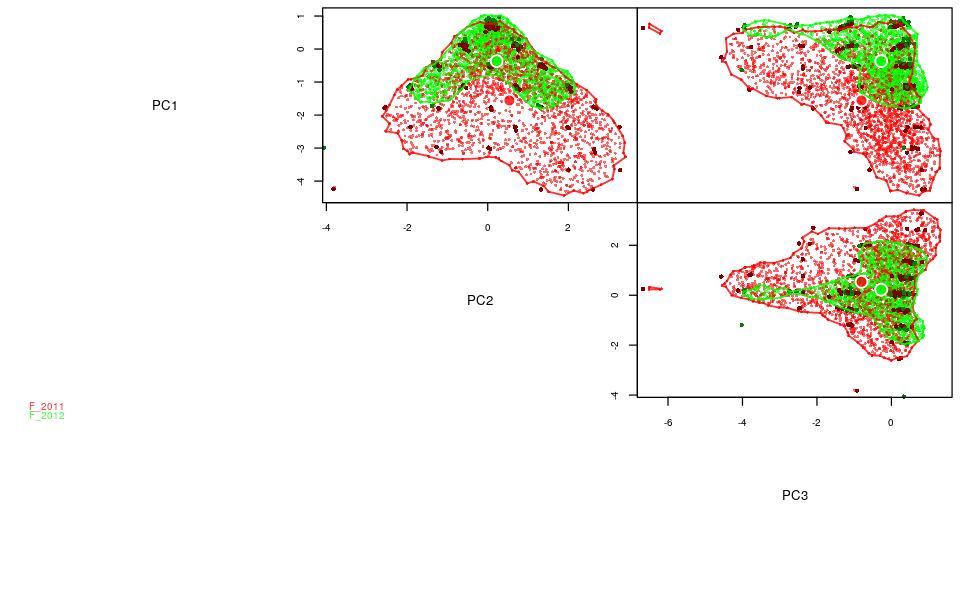

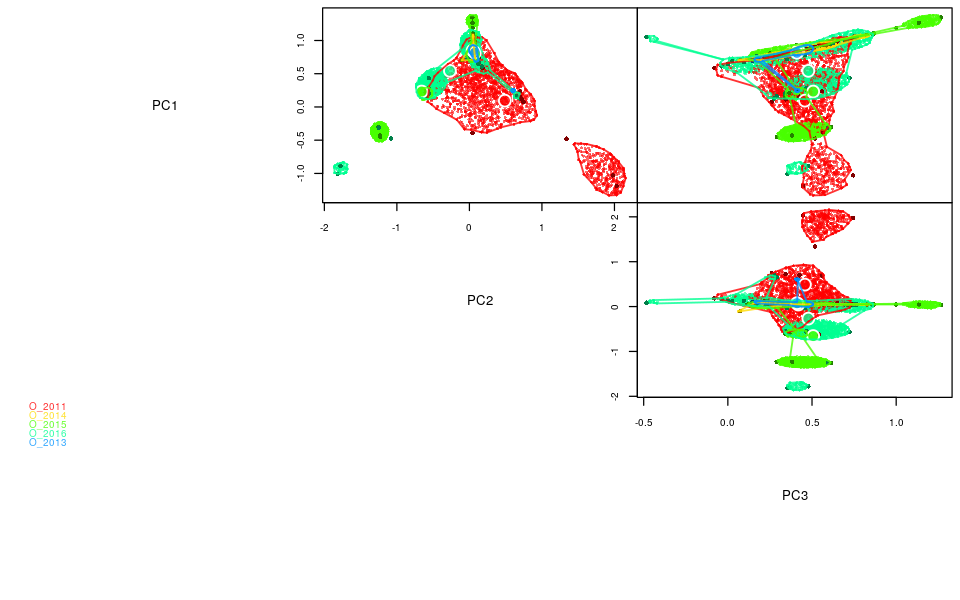

In [35]:
hvs_rslts_mamls@compare
plot_hvs(hvs_rslts_mamls)

### compare hypervolumes

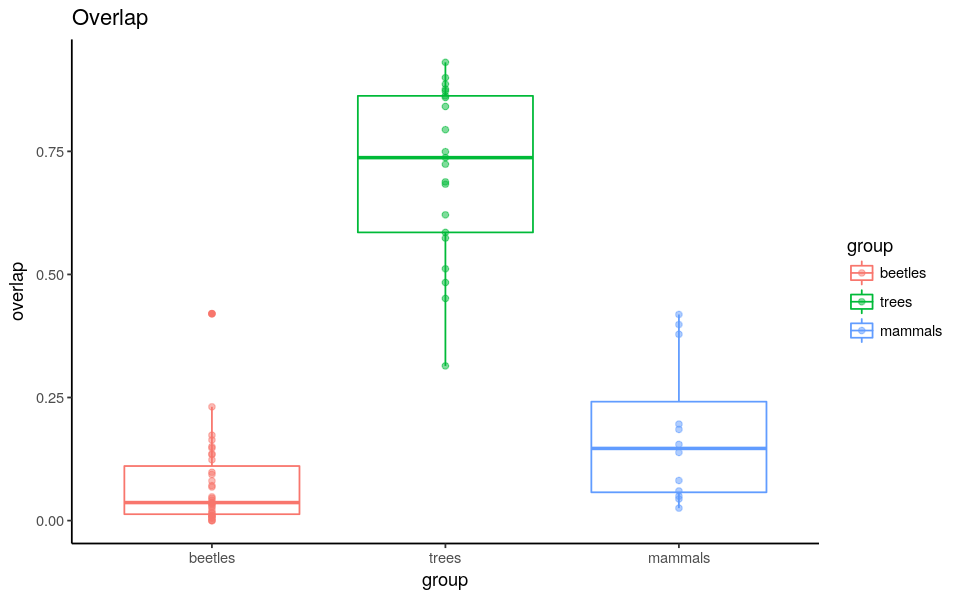

In [6]:
b = data.frame(group = "beetles", overlap = hvs_rslts_btles@compare$overlap)
t = data.frame(group = "trees",   overlap = hvs_rslts_trees@compare$overlap)
m = data.frame(group = "mammals", overlap = hvs_rslts_mamls@compare$overlap)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

plt = ggplot(data = whisker, aes(x = group, y = overlap, color = group))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("Overlap")
print(plt)

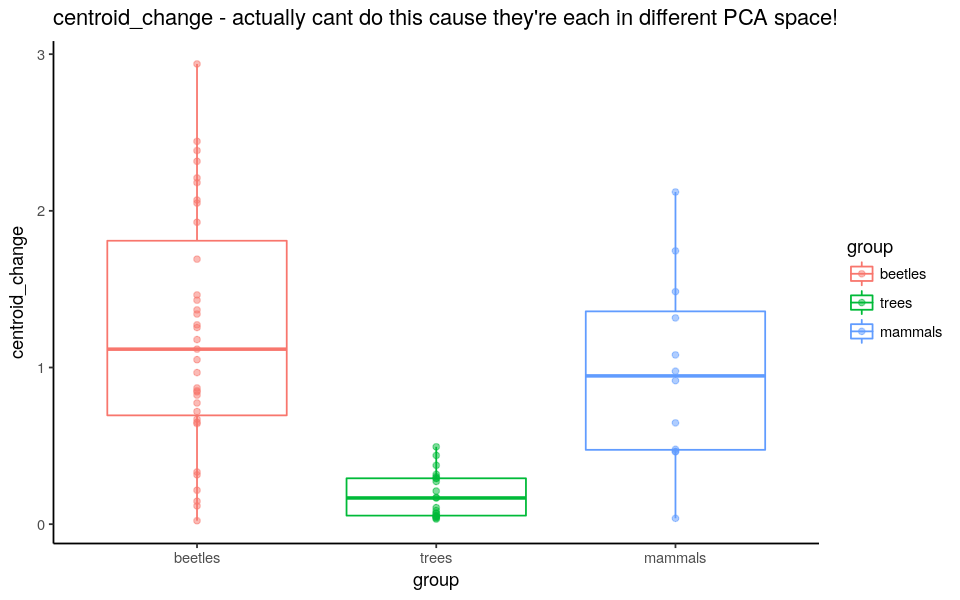

In [7]:
b = data.frame(group = "beetles", centroid_change = hvs_rslts_btles@compare$centroid_change)
t = data.frame(group = "trees",   centroid_change = hvs_rslts_trees@compare$centroid_change)
m = data.frame(group = "mammals", centroid_change = hvs_rslts_mamls@compare$centroid_change)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

plt = ggplot(data = whisker, aes(x = group, y = centroid_change, color = group))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("centroid_change - actually cant do this cause they're each in different PCA space!")
print(plt)

In [8]:
hvs_rslts_btles@compare$per_vol_change


[1]  -0.59641732 588.88496062           NA   2.57310997  -0.14166101
 [6]   4.62942400  -0.80490204   1.16360451  -0.66442187  -0.14134605
[11]  -0.54602182  15.83442734   1.27550129  -0.72628822  97.81506347
[16]  -0.44876876  39.28199177   1.87686432  -0.84738053  95.52686861
[21]   0.38597393  -0.69349002   0.59904377  -0.70069574  -0.97219681
[26]  17.61605305  10.14720810  -0.09923086   0.15073677   1.97620265
[31]           NA           NA           NA  23.08801238  -0.88969786
[36] 575.31119638  -0.80933022  82.41047731           NA  27.13180342

## model???!!!

In [9]:
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

In [10]:
btles = hvs_rslts_btles@compare
btles$taxa = "Beetles"
colnames(btles_agb) = c("plot", "agb")
btles = merge(btles, btles_agb, by = "plot")

In [11]:
trees = hvs_rslts_trees@compare
trees$taxa = "Trees"
colnames(trees_agb) = c("plot", "agb")
trees = merge(trees, trees_agb, by = "plot")

In [12]:
mamls = hvs_rslts_mamls@compare
mamls$taxa = "Mammals"
colnames(mamls_agb) = c("plot", "agb")
mamls = merge(mamls, mamls_agb, by = "plot")

In [13]:
test = rbind(trees, btles, mamls)
test = test[complete.cases(test), ]
test$taxa = as.factor(test$taxa)

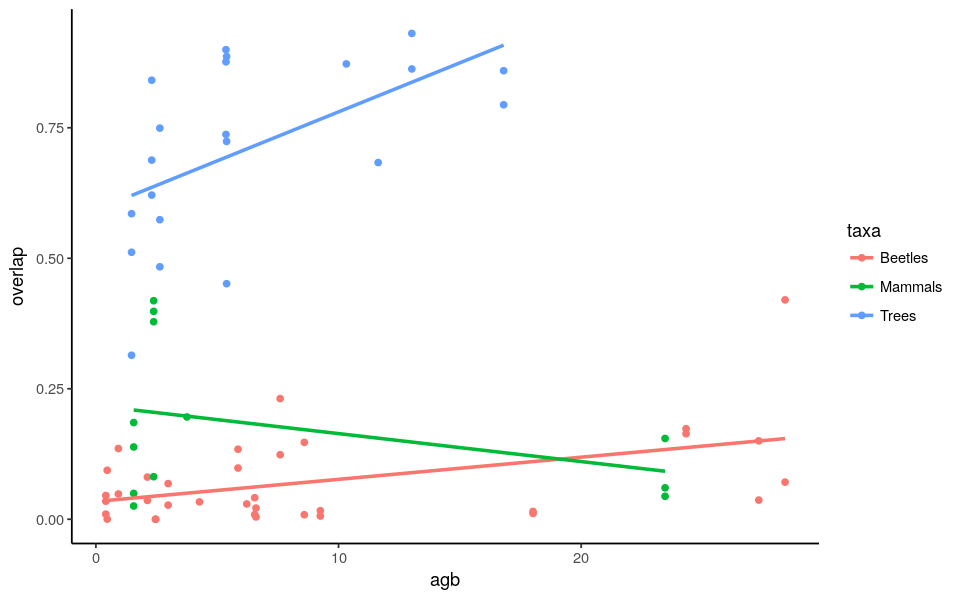

In [14]:
plt = ggplot(data = test, aes(x = agb, y = overlap, color = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + theme_classic()
print(plt)

In [15]:
model = lm(overlap ~ agb*taxa, data = test)
anova(model)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
agb,1,0.005718955,0.005718955,0.4352583,5.118634e-01
taxa,2,5.603218233,2.801609117,213.2249238,1.624512e-28
agb:taxa,2,0.202939206,0.101469603,7.7226506,1.012267e-03
Residuals,62,0.814631621,0.013139220,NA,NA


In [16]:
summary(model)


Call:
lm(formula = overlap ~ agb * taxa, data = test)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30607 -0.05868 -0.01685  0.05748  0.26574 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.033988   0.027267   1.247 0.217262    
agb              0.004244   0.002134   1.988 0.051176 .  
taxaMammals      0.183638   0.050579   3.631 0.000574 ***
taxaTrees        0.558684   0.048844  11.438  < 2e-16 ***
agb:taxaMammals -0.009602   0.004170  -2.303 0.024671 *  
agb:taxaTrees    0.014540   0.005466   2.660 0.009925 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1146 on 62 degrees of freedom
Multiple R-squared:  0.8771,	Adjusted R-squared:  0.8672 
F-statistic: 88.47 on 5 and 62 DF,  p-value: < 2.2e-16


In [17]:
I_btles = model$coefficients[1]

In [18]:
model$coefficients

(Intercept)             agb     taxaMammals       taxaTrees agb:taxaMammals 
    0.033988439     0.004244301     0.183638207     0.558684009    -0.009601510 
  agb:taxaTrees 
    0.014540310

In [19]:
trees_mdl = lm(overlap ~ agb, data = trees)
mamls_mdl = lm(overlap ~ agb, data = mamls)
btles_mdl = lm(overlap ~ agb, data = btles)

In [20]:
summary(trees_mdl)


Call:
lm(formula = overlap ~ agb, data = trees)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30607 -0.10881  0.02545  0.09354  0.20629 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.592672   0.052346   11.32 6.87e-10 ***
agb         0.018785   0.006499    2.89  0.00938 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1481 on 19 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.3054,	Adjusted R-squared:  0.2688 
F-statistic: 8.353 on 1 and 19 DF,  p-value: 0.009378


In [21]:
summary(btles_mdl)


Call:
lm(formula = overlap ~ agb, data = btles)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11330 -0.04865 -0.01885  0.03697  0.26574 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.033988   0.018398   1.847  0.07367 . 
agb         0.004244   0.001440   2.947  0.00585 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07734 on 33 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.2083,	Adjusted R-squared:  0.1844 
F-statistic: 8.685 on 1 and 33 DF,  p-value: 0.005849


In [22]:
summary(mamls_mdl)


Call:
lm(formula = overlap ~ agb, data = mamls)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18398 -0.08399 -0.02795  0.09046  0.21382 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.217627   0.052649   4.134  0.00203 **
agb         -0.005357   0.004427  -1.210  0.25407   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1417 on 10 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.1277,	Adjusted R-squared:  0.0405 
F-statistic: 1.464 on 1 and 10 DF,  p-value: 0.2541
